<a href="https://colab.research.google.com/github/IsaiahejWashington/MLA_IEW/blob/main/MLA5_IEW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning Assignment #  
Isaiah Washington

## Standard Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook.

In [ ]:
#example - you will replace this with the models you are actually using.
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier


## Imports for Splitting Data and Building Pipeline


In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

# Imports for Performance Measures

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [ ]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [ ]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1

### Reading the Data

In [ ]:
landsat_train = pd.read_csv('/content/gdrive/MyDrive/cs405/landsat_train.csv')
landsat_test = pd.read_csv('/content/gdrive/MyDrive/cs405/landsat_test.csv')

(4435, 37)


In [ ]:
landsat_train.head(5)

,top_left_r,top_left_g,top_left_infra1,top_left_infra2,top_middle_r,top_middle_g,top_middle_infra1,top_middle_infra2,top_right_r,top_right_g,...,bottom_left_infra2,bottom_middle_r,bottom_middle_g,bottom_middle_infra1,bottom_middle_infra2,bottom_right_r,bottom_right_g,bottom_right_infra1,bottom_right_infra2,land_type
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3


In [ ]:
landsat_test.head(5)

,top_left_r,top_left_g,top_left_infra1,top_left_infra2,top_middle_r,top_middle_g,top_middle_infra1,top_middle_infra2,top_right_r,top_right_g,...,bottom_left_infra2,bottom_middle_r,bottom_middle_g,bottom_middle_infra1,bottom_middle_infra2,bottom_right_r,bottom_right_g,bottom_right_infra1,bottom_right_infra2,land_type
0,80,102,102,79,76,102,102,79,76,102,...,87,79,107,109,87,79,107,113,87,3
1,76,102,102,79,76,102,106,83,76,102,...,87,79,107,113,87,79,103,104,83,3
2,80,98,106,79,76,94,102,76,76,94,...,79,79,95,100,79,79,95,96,75,4
3,76,94,102,76,76,94,102,76,76,94,...,79,79,95,96,75,79,95,100,75,4
4,76,94,102,76,76,94,102,76,76,89,...,75,79,95,100,75,75,95,100,79,4


### Statistical and Visual Exploration

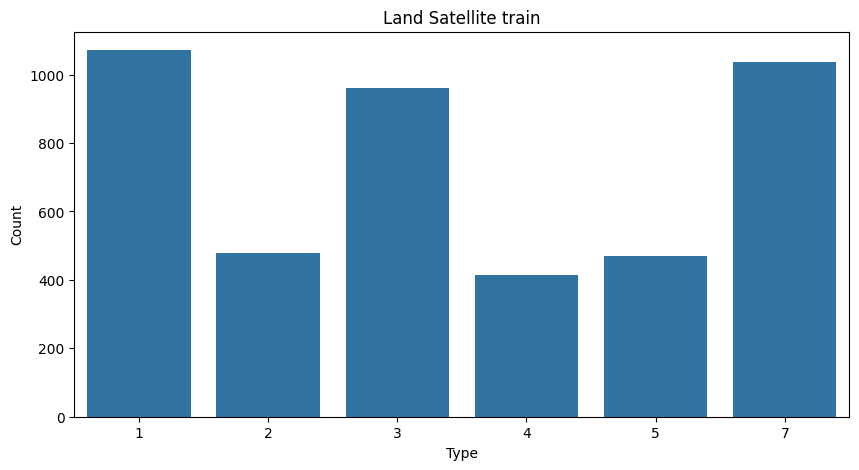

In [ ]:
plt.figure (figsize=(10, 5))
sns.countplot(data=landsat_train, x='land_type')
plt.title("Land Satellite train")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

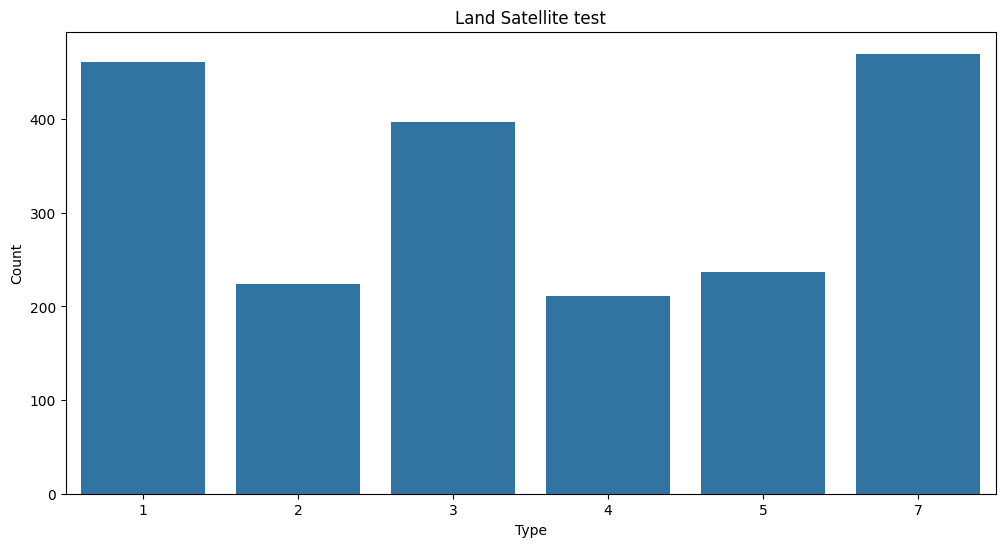

In [ ]:
plt.figure (figsize=(12, 6))
sns.countplot(data=landsat_test, x='land_type')
plt.title("Land Satellite test")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

### Splitting Data into Train/Test

In [ ]:
X_train = landsat_train.drop(columns=['land_type'])
y_train = landsat_train['land_type']

X_test = landsat_test.drop(columns=['land_type'])
y_test = landsat_test['land_type']

print("X and y trains")
print(X_train.shape, y_train.shape)

print("X and y tests")
print(X_test.shape, y_train.shape)

X and y trains
(4435, 36) (4435,)
X and y tests
(2000, 36) (4435,)


### Building the Pipeline

In [ ]:
preprocessor = ColumnTransformer(
    transformers = [
        ('num', MinMaxScaler(), X_train.columns)
    ])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=32))
])

### Executing the Model

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2',
       'top_middle_r', 'top_middle_g', 'top_middle_infra1',
       'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1',
       'top_right_infra2', 'middle_left_r', 'middle_left_g',
       'middle_left_infra1', 'middl...
       'middle_right_r', 'middle_right_g', 'middle_right_infra1',
       'middle_right_infra2', 'bottom_left_r', 'bottom_left_g',
       'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r',
       'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2',
       'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1',
       'bottom_right_infra2'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=32))])

### Evaluating Model

In [ ]:
y_pred = pipeline.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       0.98      1.00      0.99       461
           2       0.98      0.98      0.98       224
           3       0.89      0.94      0.91       397
           4       0.77      0.63      0.69       211
           5       0.92      0.89      0.90       237
           7       0.87      0.89      0.88       470

    accuracy                           0.91      2000
   macro avg       0.90      0.89      0.89      2000
weighted avg       0.90      0.91      0.90      2000



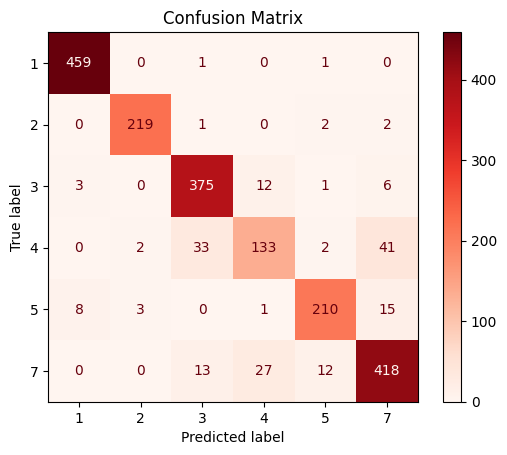

In [ ]:
ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test, cmap='Reds')
plt.title('Confusion Matrix')
plt.show()

### Conclusion
The pipeline is well suited for multi-class usage as the f1 score indicates a good balance between and precission and recall. However this model does sometimes misclassifify due to low recall scores in class 4. If that is a important class the model needs improvment. However if it isnt it is usable for land satellites.

## Problem 2




### Reading the Data

Skipping this task as it there is no need to re-upload the same dataset.

# Statistics and Visual Exploration

Text(0, 0.5, 'Count')

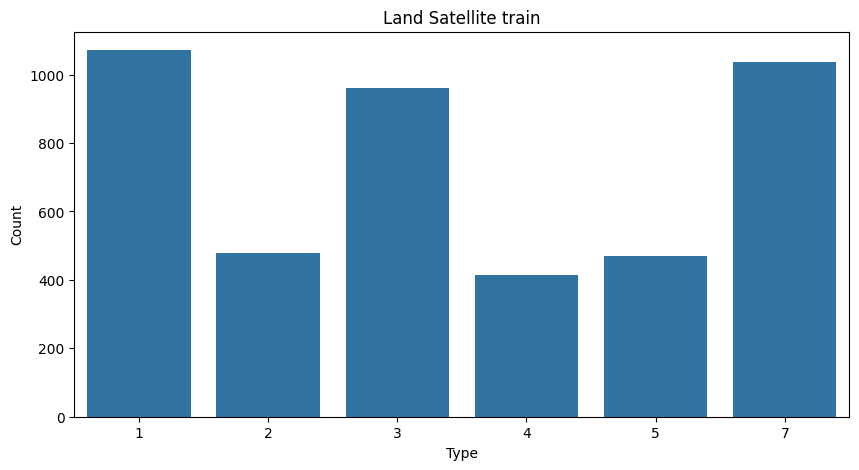

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=landsat_train, x='land_type')
plt.title("Land Satellite train")
plt.xlabel("Type")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

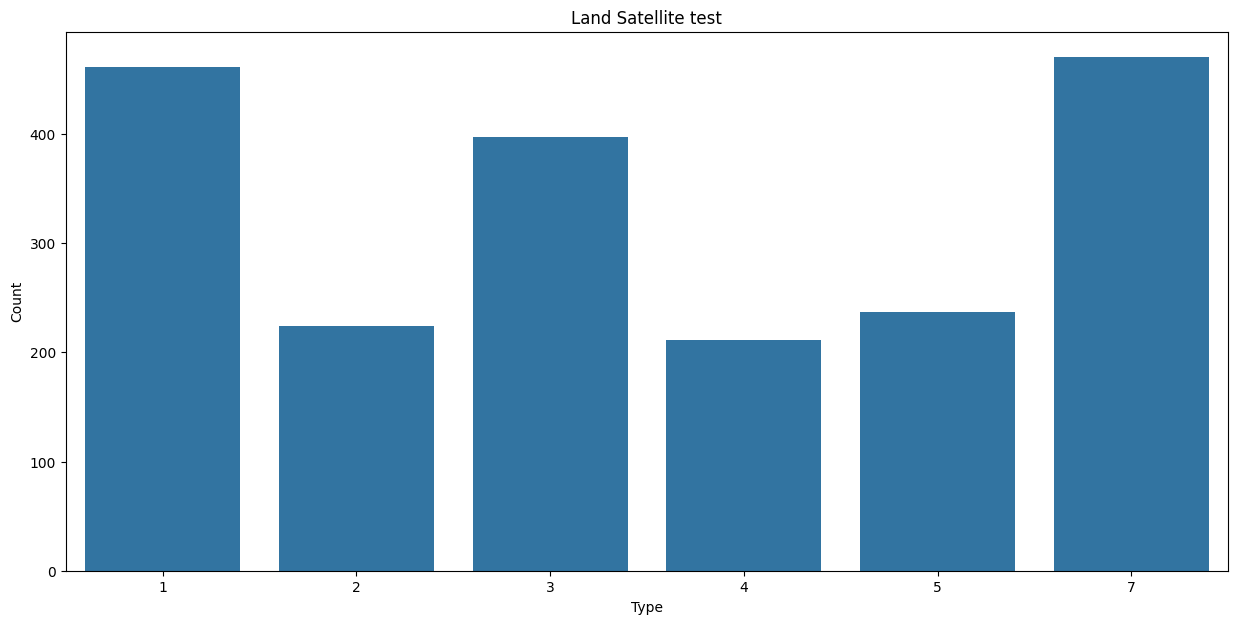

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(data=landsat_test, x='land_type')
plt.title("Land Satellite test")
plt.xlabel("Type")
plt.ylabel("Count")

### Splitting Data into Train/Test

In [ ]:
X_train = landsat_train.drop(columns=['land_type'])
y_train = landsat_train['land_type']

X_test = landsat_test.drop(columns=['land_type'])
y_test = landsat_test['land_type']

print("X and y trains")
print(X_train.shape, y_train.shape)

print("X and y tests")
print(X_test.shape, y_train.shape)

X and y trains
(4435, 36) (4435,)
X and y tests
(2000, 36) (4435,)


### Building the Pipeline

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=32)
ada = AdaBoostClassifier(n_estimators=50, random_state=32)
dt = DecisionTreeClassifier(max_depth=5, random_state=32)

voting_clf = VotingClassifier(
    estimators=[
        ('random_forest', rf),
        ('adaboost', ada),
        ('decision_tree', dt)
    ],
    voting='hard'
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), X_train.columns)
    ]
)

voting = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', voting_clf)
])

### Executing the Model

In [ ]:
voting.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2',
       'top_middle_r', 'top_middle_g', 'top_middle_infra1',
       'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1',
       'top_right_infra2', 'middle_left_r', 'middle_left_g',
       'middle_left_infra1', 'middl...
       'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2',
       'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1',
       'bottom_right_infra2'],
      dtype='object'))])),
                ('classifier',
                 VotingClassifier(estimators=[('random_forest',
                                               RandomForestClassifier(random_state=32)),
                                              ('adaboost',
                                               AdaBoostClassifier(random_state=32)),
                                              ('decision_tree',
                                               DecisionTreeClassifier(max_depth=5,
                                                                      random_state=32))]))])

### Evaluating Model

In [ ]:
y_pred = pipeline.predict(X_test)

print("Classification Report:")
print(classification_report(y_test,y_pred))


Classification Report:
              precision    recall  f1-score   support

           1       0.98      1.00      0.99       461
           2       0.98      0.98      0.98       224
           3       0.89      0.94      0.91       397
           4       0.77      0.63      0.69       211
           5       0.92      0.89      0.90       237
           7       0.87      0.89      0.88       470

    accuracy                           0.91      2000
   macro avg       0.90      0.89      0.89      2000
weighted avg       0.90      0.91      0.90      2000



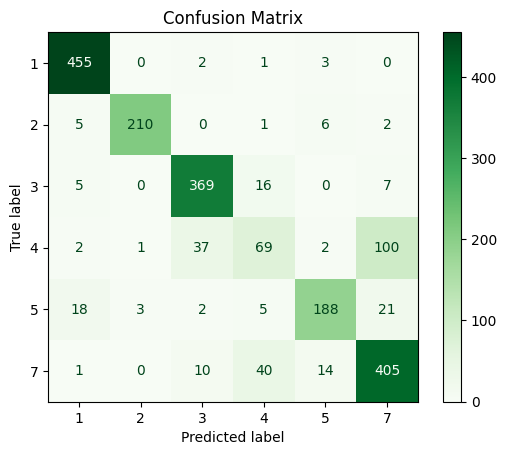

In [ ]:
ConfusionMatrixDisplay.from_estimator(voting, X_test, y_test, cmap='Greens')
plt.title("Confusion Matrix")
plt.show()

### Conclusion
This model is better suited due to the addition of voting classifier adds, adaboost, randomforest and decisiontree. In doing so the model is more accurate and diverse however it is more computational complex and thusly could lead to a better class 4 score an improvment on the previous model.

# Reading the Data


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/cs405/banknote_authentication.csv')
df.head(5)

,variance,skewness,curtosis,entropy,forgery
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


# Splitting Data Into Train/Test

In [ ]:
X= df.drop('forgery', axis=1)
y= df['forgery']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=32)
print("X train and tests")
print(X_train.shape)
print(X_test.shape)
print("y train and tests")
print(y_train.shape)
print(y_test.shape)

X train and tests
(1097, 4)
(275, 4)
y train and tests
(1097,)
(275,)


# Building the Pipeline

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', MinMaxScaler(), X_train.columns)
    ])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=32))
])

# Executing the Model

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  Index(['variance', 'skewness', 'curtosis', 'entropy'], dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=32))])

# Evaluate the Model

In [ ]:
y_pred = pipeline.predict(X_test)

print("Classificication Report:")
print(classification_report(y_test, y_pred))

Classificication Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       156
           1       0.98      1.00      0.99       119

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



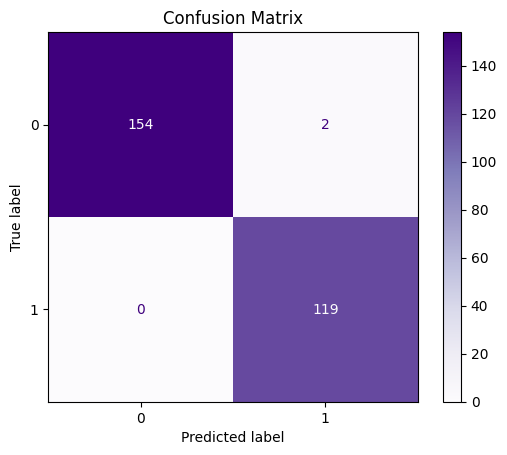

In [ ]:
ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test, cmap="Purples")
plt.title("Confusion Matrix")
plt.show()